In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diff_eqn_josh():
    return 1/(L*m)*(
        k1*v[-1]*dt**3
        -z[-1]*(-3*L*m+R*m*dt)
        -z[-2]*(3*L*m-2*R*m-k2*L*dt**2)
        -z[-3]*(L*m+R*m*dt+k2*L*dt**2-k2*R*dt**3)
    )

def diff_eqn_ever():
    # i(t+dt) = dt*v(t)/L + i(t) - R*i(t)*dt/L
    # z(t+2dt) = dt**2/m*(2*K*i_0*i(t)/z_0**2 - 2*K*i_0**2 * z(t)/z_0**3) + 2z(t+dt) - z(t)
    i_list.append(dt*v[-1]/L + i_list[-1] - R*i_list[-1]*dt/L)
    z_next = dt**2/m*(2*K*i_0*i_list[-2]/z_0**2 - 2*K*i_0**2 * z[-2]/z_0**3) + 2*z[-1] - z[-2]
    if z_next > 0:
        z_next = 0
    elif z_next < - 0.20:
        z_next = - 0.20
    try:
        print("Magnetic Force: ", K*i_list[-1]**2/z_next**2, " | Gravity: ", m*9.8)
    except:
        print("Magnet stuck on the coil")
    return z_next

def PID_josh(Kp=1, Ki=1, Kd=1):
    return (v[-1] 
            + Kd*(e[-1]-2*e[-2]+e[-3])/dt
            + Kp*(e[-2]-e[-3])
            + Ki*e[-3]*dt
           )

In [3]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
g = 9.8 # m/s^2
K = m*g*z_0**2/i_0**2 # chosen the normalization constant given the equilibrium condition
v = [0] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

print(K*i_0**2/z_0**2,m*9.8)
K*i_0**2/z_0**2 == m*9.8

0.6664000000000001 0.6664000000000001


True

In [4]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
g = 9.8 # m/s^2
K = m*g*z_0**2/i_0**2 #constant
v = [0] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

In [5]:
z = [z_0, z_0, z_0]
t = [0, dt, 2*dt]
for i in range(500):
    t.append((3+i)*dt)
    z.append(diff_eqn_ever())

Magnetic Force:  0.6503427584940313  | Gravity:  0.6664000000000001
Magnetic Force:  0.6346661416888685  | Gravity:  0.6664000000000001
Magnetic Force:  0.6193552246773268  | Gravity:  0.6664000000000001
Magnetic Force:  0.6043959400576594  | Gravity:  0.6664000000000001
Magnetic Force:  0.5897750285521184  | Gravity:  0.6664000000000001
Magnetic Force:  0.575479992992611  | Gravity:  0.6664000000000001
Magnetic Force:  0.56149905538695  | Gravity:  0.6664000000000001
Magnetic Force:  0.5478211168044659  | Gravity:  0.6664000000000001
Magnetic Force:  0.5344357198425898  | Gravity:  0.6664000000000001
Magnetic Force:  0.5213330134567045  | Gravity:  0.6664000000000001
Magnetic Force:  0.5085037199543359  | Gravity:  0.6664000000000001
Magnetic Force:  0.4959391039718281  | Gravity:  0.6664000000000001
Magnetic Force:  0.4836309432671994  | Gravity:  0.6664000000000001
Magnetic Force:  0.4715715011770656  | Gravity:  0.6664000000000001
Magnetic Force:  0.4597535005985157  | Gravity:  0.

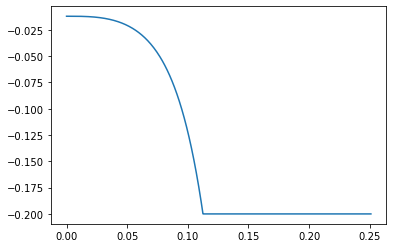

In [6]:
fig, ax = plt.subplots()
ax.plot(t, z)

# Sticking to the Coil

Magnetic Force:  0.15043584940312218  | Gravity:  0.6664000000000001
Magnetic Force:  0.15579075302524992  | Gravity:  0.6664000000000001
Magnetic Force:  0.16117375957088348  | Gravity:  0.6664000000000001
Magnetic Force:  0.16658295639768336  | Gravity:  0.6664000000000001
Magnetic Force:  0.17201657804457143  | Gravity:  0.6664000000000001
Magnetic Force:  0.17747300361014298  | Gravity:  0.6664000000000001
Magnetic Force:  0.18295075410721262  | Gravity:  0.6664000000000001
Magnetic Force:  0.18844848980738785  | Gravity:  0.6664000000000001
Magnetic Force:  0.19396500758877352  | Gravity:  0.6664000000000001
Magnetic Force:  0.19949923829915253  | Gravity:  0.6664000000000001
Magnetic Force:  0.20505024414626088  | Gravity:  0.6664000000000001
Magnetic Force:  0.21061721612608394  | Gravity:  0.6664000000000001
Magnetic Force:  0.2161994714994444  | Gravity:  0.6664000000000001
Magnetic Force:  0.22179645132653197  | Gravity:  0.6664000000000001
Magnetic Force:  0.2274077180684456

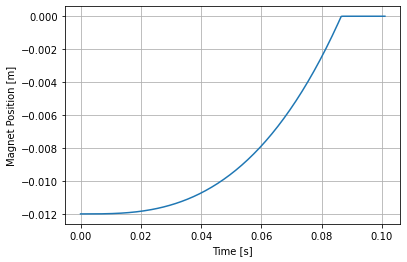

In [7]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
K = 6.53e-5/2 #constant
k1 = 1 # electrical constant
k2 = 1 # positional constant
v = [20] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

t = [0, dt, 2*dt]
for i in range(200):
    t.append((3+i)*dt)
    z.append(diff_eqn_ever())
    
fig, ax = plt.subplots()
ax.plot(t, z)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Magnet Position [m]")
ax.grid()

## Dropping to the ground

Magnetic Force:  0.1416145862667075  | Gravity:  0.6664000000000001
Magnetic Force:  0.1382020140378427  | Gravity:  0.6664000000000001
Magnetic Force:  0.1348710987074652  | Gravity:  0.6664000000000001
Magnetic Force:  0.1316196235072472  | Gravity:  0.6664000000000001
Magnetic Force:  0.128445447361579  | Gravity:  0.6664000000000001
Magnetic Force:  0.12534650178310597  | Gravity:  0.6664000000000001
Magnetic Force:  0.12232078791182732  | Gravity:  0.6664000000000001
Magnetic Force:  0.11936637369024664  | Gravity:  0.6664000000000001
Magnetic Force:  0.11648139116750843  | Gravity:  0.6664000000000001
Magnetic Force:  0.11366403392586691  | Gravity:  0.6664000000000001
Magnetic Force:  0.1109125546232227  | Gravity:  0.6664000000000001
Magnetic Force:  0.10822526264582262  | Gravity:  0.6664000000000001
Magnetic Force:  0.1056005218655598  | Gravity:  0.6664000000000001
Magnetic Force:  0.10303674849662839  | Gravity:  0.6664000000000001
Magnetic Force:  0.10053240904658432  | Gr

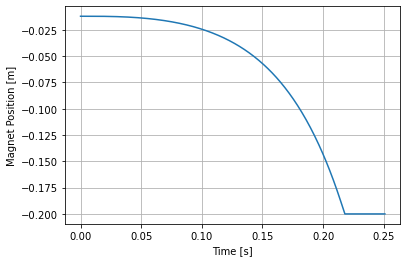

In [8]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
K = 6.53e-5/2 #constant
k1 = 1 # electrical constant
k2 = 1 # positional constant
v = [0] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

t = [0, dt, 2*dt]
for i in range(500):
    t.append((3+i)*dt)
    z.append(diff_eqn_ever())
    
fig, ax = plt.subplots()
ax.plot(t, z)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Magnet Position [m]")
ax.grid()